In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist#Hàm tính khoảng cách

In [2]:
class Kmeans:
  def __init__(self, n_clusters):
    self.K = n_clusters
    self.centers = []
    self.labels = []
    self.inertia_ = 0
  
  def init_centers(self,X):#Khởi tạo center ngẫu nhiên 
   return X[np.random.choice(X.shape[0],self.K,replace=False)]
  #CHọn ngẫu nhiên K input từ cái X ban đầu làm center 
  
  #Gán nhãn cho các điểm khi biết dc center(nó là bài toán cố định M(center) tìm Y)
  def assign_labels(self,X):
   D=cdist(X,self.centers) #Khoảng cách từ X đến center
   return np.argmin(D,axis=1)# trả về giá trị tại đó để hàm dạt cực tiểu
  
  #Cập nhật center mới cho cụm dữ liệu (Cố định y , tìm M) 
  def update_centers(self,X):
   centers_update=np.zeros((self.K,X.shape[1])) # Khỏi tạo ma trận K kích thước là K * X.shape[1]
   for k in range(self.K):
   	   Xk=X[self.labels == k,:] #Tìm các X thuộc từng nhóm
   	   centers_update[k,:]=np.mean(Xk,axis=0) #Tính trung bình cộng từ tất cả các điểm thuộc nhóm đó để tìm center mới
   return centers_update

  #Điều kiện dừng là khi center mới ko khác j center cũ
  def has_converged(self,new_centers): 
   return (set([tuple(a) for a in self.centers]) == set([tuple(a) for a in new_centers]))

  def intertia(self,X):
    return np.sum(np.min(cdist(X,self.centers) ** 2,1))

  def fit(self,X):
   self.centers=self.init_centers(X) 
   #print(self.centers) 
   while True:
   	   self.labels= self.assign_labels(X)
   	   new_centers=self.update_centers(X)
   	   if self.has_converged(new_centers):
   	      break
   	   self.centers=new_centers
   self.inertia_ = self.intertia(X)







In [3]:
from matplotlib.image import imread #Thư viện dùng để đọc ảnh
import matplotlib.pyplot as plt

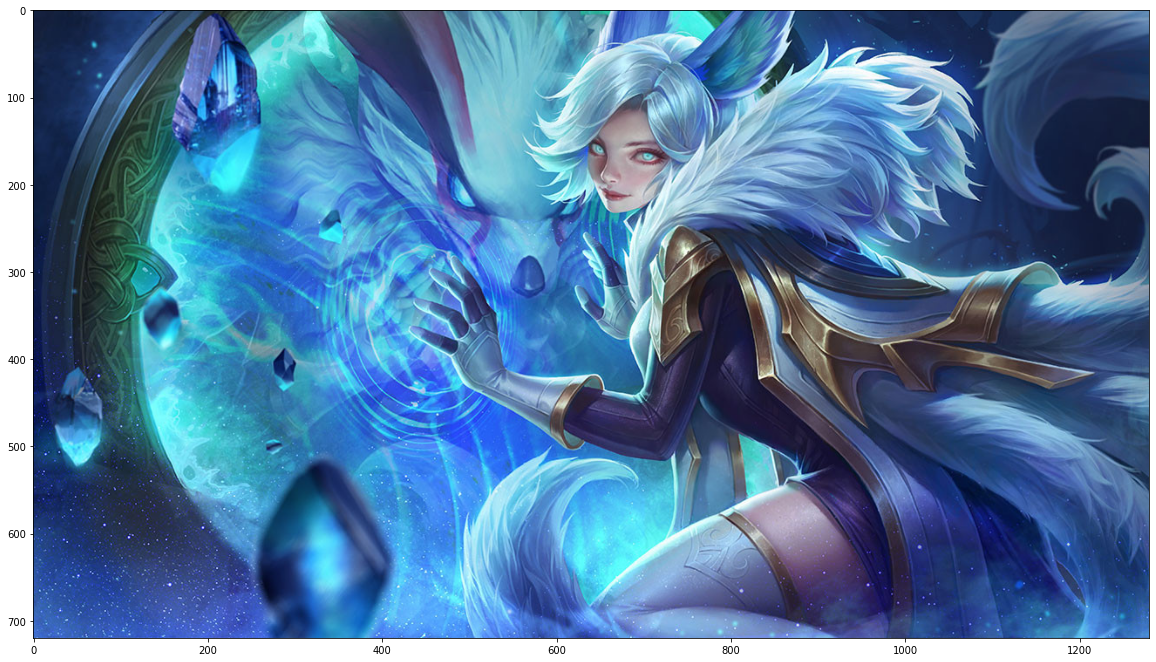

In [4]:
image_path = 'liliana.jpg'
new_image = imread(image_path)

plt.figure(figsize=(20,20))
plt.imshow(new_image)

In [5]:
new_image = new_image/255.0
new_image.shape

(720, 1280, 3)

In [6]:
X = new_image.reshape(-1,3)
X.shape

(921600, 3)

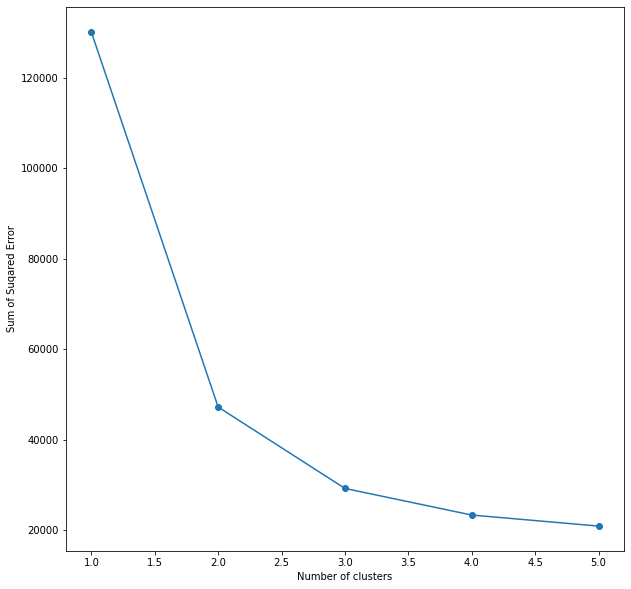

In [ ]:
k_clusters = list(range(1,6))
sse = []

for k in k_clusters:
  K = k
  k_means = Kmeans(n_clusters = K)
  k_means.fit(X)
  sse.append(k_means.inertia_) 

plt.figure(figsize=(10,10))
plt.plot(k_clusters, sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Suqared Error')
plt.show()

In [ ]:
print(sse)

[130171.81043491387, 47263.76110652244, 29268.54329174322, 23386.027368994724, 20945.346638434658]


In [51]:
K = 300

k_means = Kmeans(n_clusters = K)
k_means.fit(X)

In [52]:
print(k_means.centers)

[[0.12035217 0.38417687 0.56325221]
 [0.19525619 0.25493505 0.55827431]
 [0.04128609 0.22700345 0.36254506]
 [0.15983046 0.27402614 0.3533271 ]
 [0.14489057 0.1885447  0.24071835]
 [0.33415714 0.65163512 0.9814134 ]
 [0.34614327 0.69041537 0.80752367]
 [0.43060546 0.46326606 0.47763557]
 [0.36927665 0.5804625  0.84438729]
 [0.23926541 0.52088224 0.80572886]
 [0.16223457 0.2014341  0.40776468]
 [0.07426687 0.14905431 0.5071934 ]
 [0.32808725 0.62635438 0.77705338]
 [0.15369258 0.13170529 0.21891323]
 [0.48439702 0.6445983  0.94033316]
 [0.31043415 0.59444545 0.89816873]
 [0.40221832 0.4783144  0.75035963]
 [0.21998223 0.48052325 0.84206077]
 [0.30189191 0.60698023 0.71416572]
 [0.23795824 0.33009309 0.65207393]
 [0.34997267 0.51742001 0.76882367]
 [0.19822724 0.61747484 0.60221516]
 [0.31029755 0.7537711  0.82522101]
 [0.42144216 0.63023436 0.80252361]
 [0.28252798 0.73261064 0.96018344]
 [0.44680229 0.795394   0.90802923]
 [0.13688062 0.20216336 0.17559084]
 [0.48071668 0.59156251 0.77

In [53]:
img_seg = k_means.centers

In [54]:
img_seg = img_seg[k_means.labels]
img_seg = img_seg.reshape(new_image.shape)

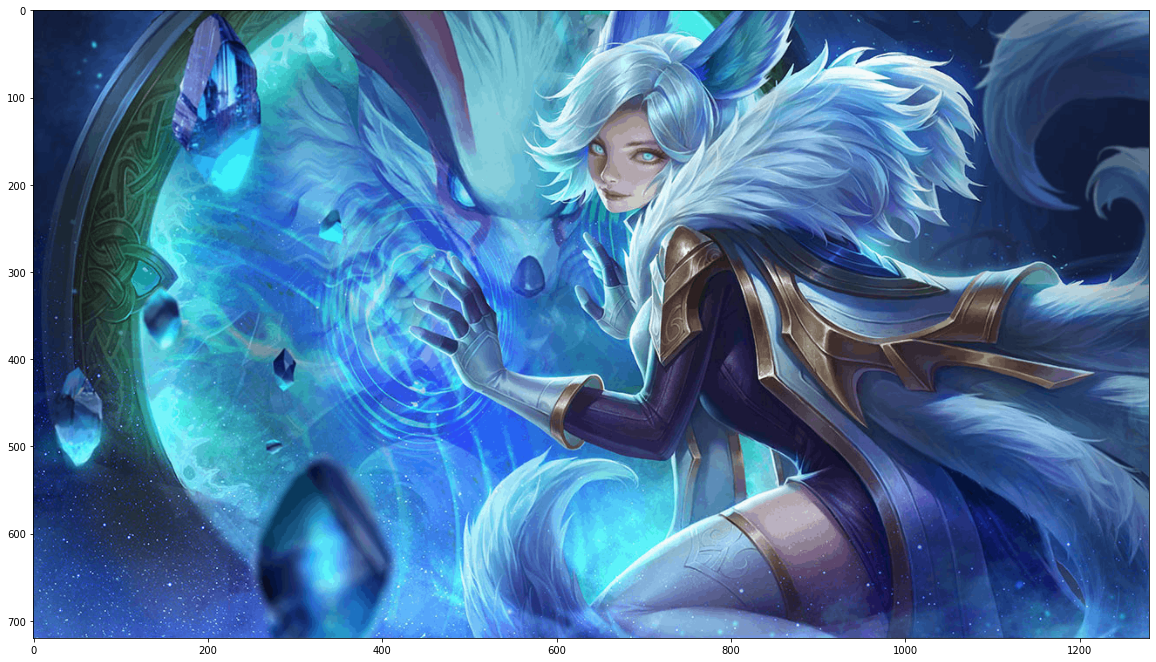

In [55]:
image_after_using_kmeans = "image compression.jpg"
plt.imsave(image_after_using_kmeans, img_seg) #dùng để lưu hình
plt.figure(figsize=(20,20))
plt.imshow(img_seg)

In [56]:
#Xem tỉ lệ giống nhau của hai hình ảnh
from skimage.metrics import structural_similarity

import imutils

import cv2 
from google.colab.patches import cv2_imshow

image1 = cv2.imread(image_path)
image2 = cv2.imread(image_after_using_kmeans)
final_frame = cv2.hconcat((image1,image2))
cv2_imshow(final_frame)

(score, diff) = structural_similarity(image1,image2,full = True,multichannel = True)
print("Structural Similarity Index: {} ".format(score*100)+str('%'))

Output hidden; open in https://colab.research.google.com to view.